**Importing dependencies:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as plio
plio.templates
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings(action = 'ignore')

**Loading dataset:**

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Exploring Data:**

In [ ]:
cat = df.select_dtypes(include = 'object').columns
num = df.select_dtypes(exclude = 'object').columns
print(f'We have {len(cat)} no of caterical features:\n {cat}\n\nWe have {len(num)} no of numerical features:\n {num}')

We have 4 no of caterical features:
 Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

We have 5 no of numerical features:
 Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')


**Checking duplicates:**

In [ ]:
df[df.duplicated(keep = False)]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
duplicates = df[df.duplicated()]

In [ ]:
new_df = df.drop(duplicates.index)

In [ ]:
new_df.to_csv('cleaned_car_data.csv')

In [ ]:
new_df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


**Exploratory Data Analysis:**

In [ ]:
year = new_df['Year'].value_counts().keys()
no_of_cars = new_df['Year'].value_counts().values
text = [str(value) for value in no_of_cars]

fig = px.bar(x = year, y = no_of_cars, title = "No of cars v/s Year", text = text, template = 'plotly')
fig.update_xaxes(title_text = 'Year')
fig.update_yaxes(title_text = 'Number of Cars')

* From the above plot we can clearly see that, highest number of cars are from **2015**.

In [ ]:
fuel_type = new_df.Fuel_Type.value_counts().keys()
count = new_df.Fuel_Type.value_counts().values
text = [str(value) for value in count]

fig = px.pie(df, names = fuel_type, values = count, title = 'Fuel Type Distribution')

fig.show()

* **79.9%** of the cars have **Petrol** as their fuel type.

<Axes: xlabel='Selling_Price', ylabel='Count'>

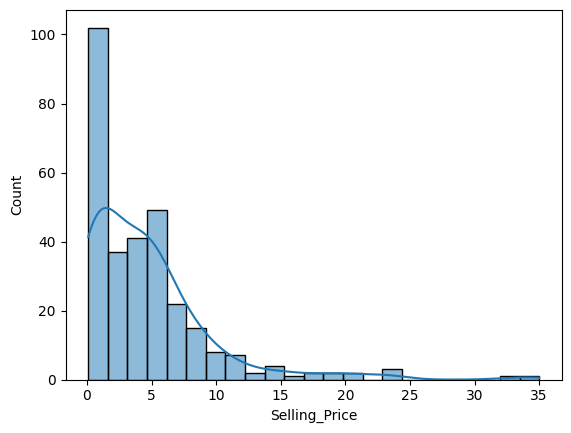

In [ ]:
sns.histplot(new_df['Selling_Price'], kde = True)

* Most of the car's selling price ranges within 10 lakhs

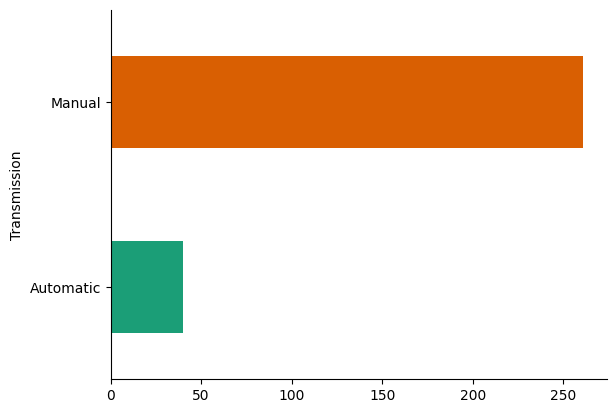

In [ ]:
df.groupby('Transmission').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
trans = new_df.Transmission.value_counts().keys()
val = new_df.Transmission.value_counts().values
text = [str(i) for i in val]

fig = px.bar(x= trans, y = val, template = 'plotly', text = text, title = 'Transmission Distribution')
fig.update_xaxes(title_text = 'Transmission Type')
fig.update_yaxes(title_text = 'Count')

* Most of the cars have Manual Transmission.

In [ ]:
new_df.sample()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
140,Honda CBR 150,2013,0.6,1.2,32000,Petrol,Individual,Manual,0


<Axes: xlabel='Driven_kms', ylabel='Count'>

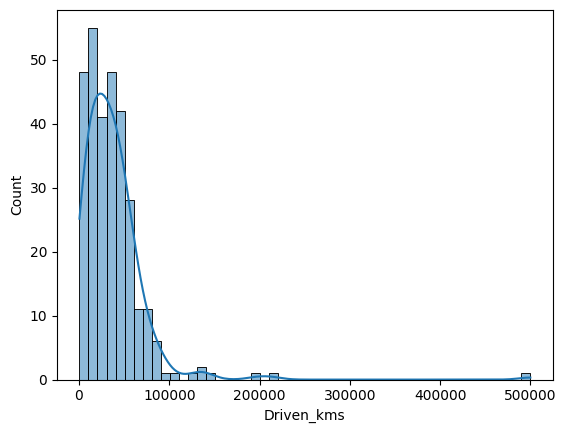

In [ ]:
sns.histplot(new_df, x = 'Driven_kms', kde = True)

* Most of the cars driven kilometers are within 1,00,000.

In [ ]:
new_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cat

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

**Preprocessing:**

In [ ]:
fuel_df = pd.get_dummies(new_df['Fuel_Type'])
selling_df = pd.get_dummies(new_df['Selling_type'])
transmission_df = pd.get_dummies(new_df['Transmission'])

final_df = pd.concat([new_df, fuel_df, selling_df, transmission_df], axis = 1)

In [ ]:
final_df.drop(columns = ['Fuel_Type', 'Selling_type', 'Transmission'], axis = 1, inplace = True)

In [ ]:
final_df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1


**Preparation for Data Modeling:**

In [ ]:
X = final_df.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = final_df.Selling_Price

In [ ]:
X.shape

(299, 11)

In [ ]:
y.shape

(299,)

**Train Test Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [ ]:
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'ElasticNet' : ElasticNet(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()

}

In [ ]:
model_list = []
score = []

for i in range(len(models)):
  model = list(models.values())[i]
  model.fit(X_train, y_train)
  print(f'{list(models.keys())[i]} is completed...')
  s = model.score(X_test, y_test)
  score.append(s)

  model_list.append(list(models.keys())[i])

LinearRegression is completed...
Ridge is completed...
Lasso is completed...
ElasticNet is completed...
RandomForestRegressor is completed...
GradientBoostingRegressor is completed...
XGBRegressor is completed...


In [ ]:
list(zip(model_list, score))

[('LinearRegression', 0.8087669575570858),
 ('Ridge', 0.8087702931762561),
 ('Lasso', 0.7620350861258943),
 ('ElasticNet', 0.7813524936796002),
 ('RandomForestRegressor', 0.9039097453159681),
 ('GradientBoostingRegressor', 0.933139538600711),
 ('XGBRegressor', 0.9246286516284369)]

In [ ]:
pd.DataFrame(list(zip(model_list, score)), columns = ['Model', 'Score']).sort_values(by = 'Score', ascending = False)

,Model,Score
5,GradientBoostingRegressor,0.933140
6,XGBRegressor,0.924629
4,RandomForestRegressor,0.903910
1,Ridge,0.808770
0,LinearRegression,0.808767
3,ElasticNet,0.781352
2,Lasso,0.762035


In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
print(f"Mean squared error : {mean_squared_error(y_test, pred)}")
print(f"R2 Score : {r2_score(y_test, pred)}")

Mean squared error : 1.7532320949047298
R2 Score : 0.9327831699927929


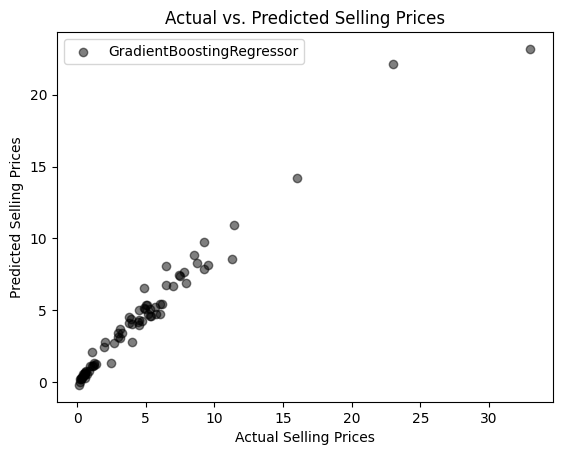

In [ ]:
plt.scatter(y_test, pred, label = 'GradientBoostingRegressor', alpha = 0.5, color = 'black')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

**Top 5 Features:**

<Axes: >

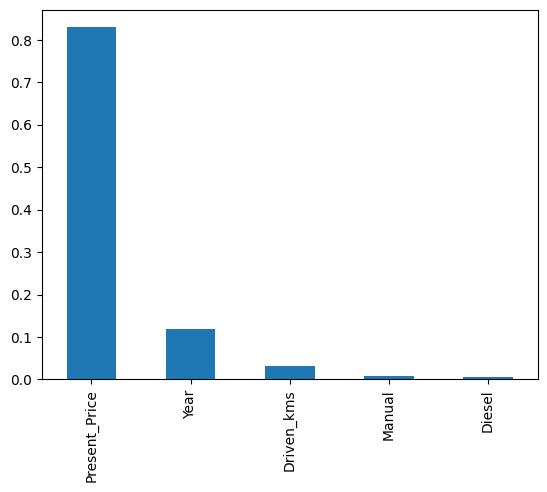

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns)

feature_importance.nlargest(5).plot(kind = 'bar')